# 1. Feedforward: Building a ReLU neural net-work
Consider the rectified linear activation function : hj = max(0, aj ).

## 1.1 Draw a network with:

• 2 inputs

• 1 hidden layers with 4 hidden units and a 

• 1-class output (for binary classification)

![caption](P1.jpeg)

## 1.2 Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).

h1 = $max(0,x_{1}*w_{11}+x_{2}*w_{21}+b_{1})$

h2 = $max(0,x_{1}*w_{12}+x_{2}*w_{22}+b_{2})$

h3 = $max(0,x_{1}*w_{13}+x_{2}*w_{23}+b_{3})$

h4 = $max(0,x_{1}*w_{14}+x_{2}*w_{24}+b_{4})$

y = $g(v_{1}*h_{1} + v_{2}*h_{2} + v_{3}*h_{3} + v_{4}*h_{4} +c)$

y = $\frac{1} {1+e^{-(v_{1}*h_{1} + v_{2}*h_{2} + v_{3}*h_{3} + v_{4}*h_{4} +c)}}$

## 1.3 Write out the forward-pass function in python, call it ff nn ReLu(...)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
import tensorflow as tf
tf.nn.sigmoid
tf.tensordot
tf.nn.relu

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [4]:
def nn_layer(x, w, b, f):
  return f(tf.tensordot(x, w, axes = 1) + b)

def nn_two_layers(x, params, f_hidden, f_out):
    h = nn_layer(x, params[0], params[1], f_hidden)
    y_hat = nn_layer(h, params[2], params[3], f_out)
    return y_hat

## 1.4 What are the class probabilities associated with the forward pass of each sample?

In [7]:
X = tf.constant([[1, -1], [0, -1], [0, 1]], dtype = tf.float32) 
W1 = tf.constant([[1, -1, 0, 1], [0, 0, 0.5, 1]], dtype = tf.float32) 
b1 = tf.constant([0, 0, 1, 0], dtype = tf.float32) 
W2 = tf.constant([1, 0, -1, 1], dtype = tf.float32) 
b2 = tf.constant([1], dtype = tf.float32) 

yhat = nn_two_layers(X, [W1, b1, W2, b2], tf.nn.relu, tf.nn.sigmoid)
print(yhat.numpy().squeeze())

[0.81757444 0.6224593  0.6224593 ]


# 2. Gradient Descent

## 2.1 What are the partial derivatives of f with respect to x and to y?


$\frac{df}{dx} =-3 x^2 +100 x -200y^2$

$\frac{df}{dy} = 800 y^3 - 400xy$

## 2.2 Create a visualization of the contours of this function.

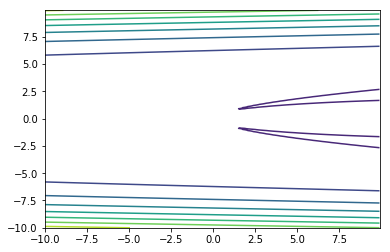

In [8]:
delta = 0.1
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3 - X ** 3) + 50 * ((2 * (Y ** 2) - X) ** 2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

## 2.3 Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [9]:
def grad_f(vector):
    x, y = vector
    df_dx = -3 * (x ** 2) + 100 * x - 200 * (y ** 2)
    df_dy = 800 * (y ** 3) - 400 * x * y
    return np.array([df_dx, df_dy])

In [10]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-10, 10, size = 2)
    else:
        point = starting_point
        
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

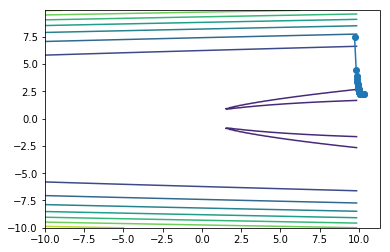

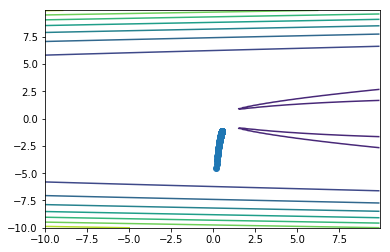

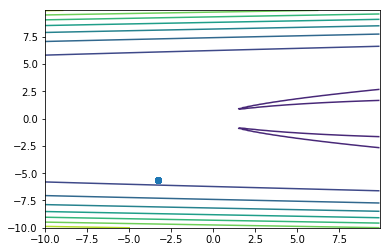

In [11]:
np.random.seed(2020)
for i in [0.00001,0.000005,0.00000000001]:
  traj = grad_descent(iterations=100, learning_rate=i)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

## 2.4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [12]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    
    if starting_point is None:
        point = np.random.uniform(-10, 10, size = 2)
    else:
        point = starting_point
        
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha * v + epsilon * grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

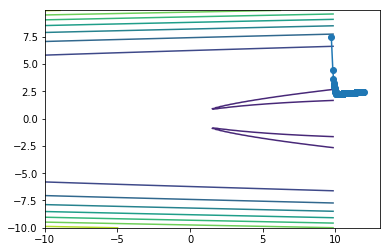

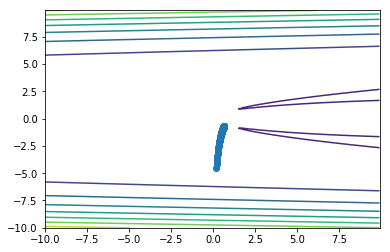

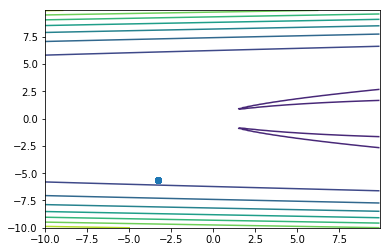

In [16]:
np.random.seed(2020)
for i in [0.00001,0.000005,0.00000000001]:
  traj = grad_descent_with_momentum(iterations=500,epsilon=i,alpha=.1)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

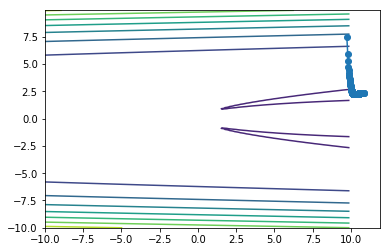

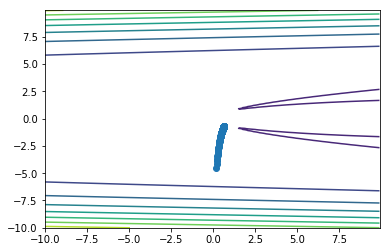

In [20]:
np.random.seed(2020)
for i in [0.00000001,0.000011]:
  traj = grad_descent_with_momentum(iterations=500,epsilon=0.000005,alpha=i)

  fig, ax = plt.subplots()
  CS = ax.contour(X, Y, Z)
  x= traj[:,0]
  y= traj[:,1]
  plt.plot(x,y,'-o')

# 3. Backprop

## 3.1 For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


![caption](IMG_0774.jpg)


## 3.2 Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [22]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [23]:
W = [[1, -1, 0, 1], [0, 0, .5, 1]]
b = np.array([0,0,1,0]).transpose()
v = [1,0,-1,1]
c = 1

In [24]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat))
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3], dL_db[0], dL_db[1], dL_db[2], dL_db[3], dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y) 

## 3.3 Generate a synthetic dataset like the XOR pattern (see below).

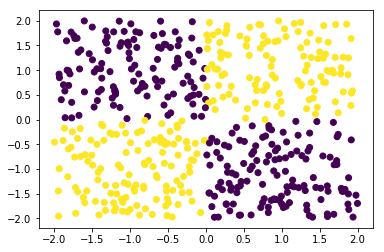

In [25]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

## 3.4 Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.


In [26]:
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

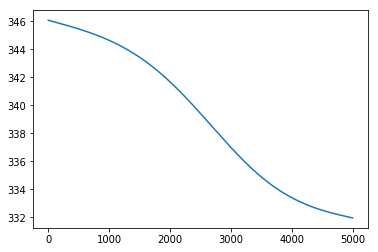

In [27]:
traj, losses = grad_descent(x, y, iterations=5000,learning_rate=1e-2)
plt.plot(losses)

## 3.5 Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [28]:
def grad_descent(x, y,  iterations=100, alpha=1.0, epsilon=0.01):
    point = np.random.uniform(-.1,.1,size=17).astype("float32")
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad=grad_f(point, x, y)
        v = alpha * v + epsilon *grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

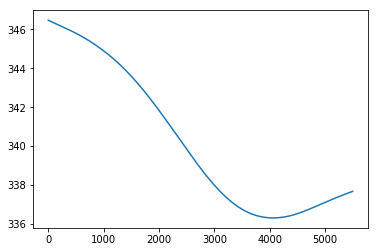

In [29]:
traj, losses = grad_descent(x, y, iterations=5500,alpha=0.001, epsilon=0.01)
plt.plot(losses)


## 3.6 Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

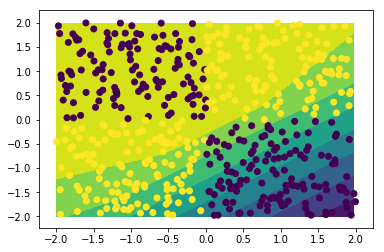

In [31]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)